 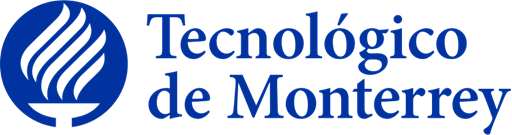


Maestría en Inteligencia Artificial Aplicada
**texto en negrita**
Proyecto Integrador
Septiembre – Diciembre
2025

Actividad 3
Avance 1. Análisis exploratorio de datos

Docentes:

*  Dra. Grettel Barceló Alonso
*  Dra. Verónica Sandra Guzmán De Valle

Asesor:

*   Dr. Luis Eduardo Falcón

Alumno:
*   Carlos Enríquez Gorgonio
A01793102
  
Septiembre 2025


Librerias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from tabulate import tabulate

REalizamos la cargga y visualizacion del dataset
```
# Esto tiene formato de código
```



In [22]:
file_path = '/mnt/df_forestal.xlsx'
df = pd.read_excel(file_path, header=0)
df.head()

,Clave de Incendio,Fecha de Reporte,Longitud Grados,Longitud Minutos,Longitud Segundos,Latitud Grados,Latitud Minutos,Latitud Segundos,Cve de Municipio,Municipio,...,Tipo de Incendio,Tipo de Vegetación,Zona Bioclimática,Arbolado Adulto,Renuevo,Arbustivo,Herbaceo,Hojarasca,Total (ha),Costo Estimado del Incendio
0,25-10-0001,2025-07-22 15:10:00,105,2,18.0,23,9,29.0,23,Pueblo Nuevo,...,Superficial,Bosque de Encino-Pino,Cálida húmeda,0.0,0.0000,38.5400,24.5254,42.0436,105.1090,1400
1,25-10-0002,2025-07-21 23:50:00,106,16,25.0,25,11,40.0,37,Topia,...,Superficial,Bosque de Pino,Templada subhúmeda,0.0,1.7069,15.3622,10.2415,17.0692,44.3798,1150
2,25-10-0003,2025-07-01 12:49:00,104,42,30.0,24,6,52.0,5,Durango,...,Superficial,Pastizal Natural,Templada semiárida,0.0,0.0000,1.1314,5.6571,0.0000,6.7885,1150
3,25-10-0004,2025-04-24 10:38:00,104,41,50.0,23,56,0.0,5,Durango,...,Superficial,Bosque de Encino,Templada subhúmeda,0.0,0.0000,6.3044,12.6087,0.0000,18.9131,1150
4,25-10-0005,2025-07-22 14:50:00,105,19,19.0,23,54,35.0,5,Durango,...,Superficial,Bosque de Pino-Encino,Templada subhúmeda,0.0,0.0000,0.0000,0.0000,22.7810,22.7810,1150


Tipos de datos

In [31]:
print(df.dtypes)

Clave de Incendio                      object
Fecha de Reporte               datetime64[ns]
Longitud Grados                         int64
Longitud Minutos                        int64
Longitud Segundos                     float64
Latitud Grados                          int64
Latitud Minutos                         int64
Latitud Segundos                      float64
Cve de Municipio                        int64
Municipio                              object
Predio/Paraje                          object
Causa                                  object
Causa Especifica                       object
Fecha de Inicio                datetime64[ns]
Fecha de Liquidación           datetime64[ns]
Tipo de Incendio                       object
Tipo de Vegetación                     object
Zona Bioclimática                      object
Arbolado Adulto                       float64
Renuevo                               float64
Arbustivo                             float64
Herbaceo                          

Visualizamos la distribucion de valores de nuestra columna principal

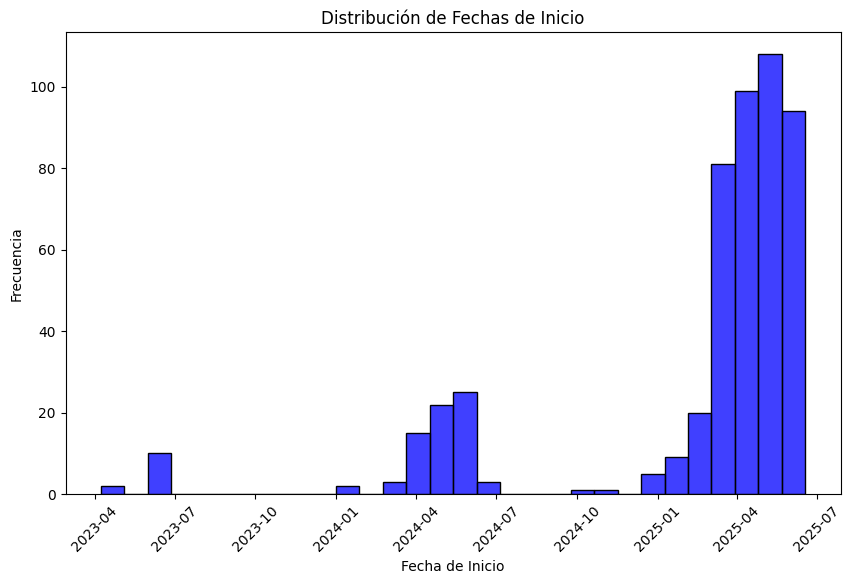

In [37]:
df['Fecha de Inicio'] = pd.to_datetime(df['Fecha de Inicio'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(df['Fecha de Inicio'], kde=False, bins=30, color='blue')  # Histograma sin la curva KDE
plt.title('Distribución de Fechas de Inicio')
plt.xlabel('Fecha de Inicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las fechas en el eje X para mejor visibilidad
plt.show()

In [34]:
num_columnas = df.shape[1]
print(f"El número de columnas en el DataFrame es: {num_columnas}")

El número de columnas en el DataFrame es: 25


Visualizamos las estadisticas generales del dataset

In [28]:
df.describe()

,Fecha de Reporte,Longitud Grados,Longitud Minutos,Longitud Segundos,Latitud Grados,Latitud Minutos,Latitud Segundos,Cve de Municipio,Fecha de Inicio,Fecha de Liquidación,Arbolado Adulto,Renuevo,Arbustivo,Herbaceo,Hojarasca,Total (ha),Costo Estimado del Incendio
count,500,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2025-04-20 09:55:24.360000,104.750000,30.71000,30.411160,23.108000,34.656000,29.170780,18.960000,2025-02-12 20:09:36,2025-02-15 20:26:52.800000,1.887349,11.661049,70.216661,93.880269,85.368770,263.014098,21036.324000
min,2023-05-18 18:14:00,103.000000,0.00000,0.000000,22.000000,0.000000,0.000000,1.000000,2023-04-08 00:00:00,2023-04-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000
25%,2025-05-06 01:41:00,104.000000,20.00000,15.517500,22.000000,17.000000,15.000000,14.000000,2025-03-08 00:00:00,2025-03-09 18:00:00,0.000000,0.000000,0.267500,1.362475,1.799725,5.005950,4980.000000
50%,2025-06-11 12:27:30,105.000000,31.50000,30.495000,23.000000,40.000000,29.000000,17.000000,2025-04-12 00:00:00,2025-04-15 00:00:00,0.000000,0.000000,5.573200,9.621750,10.115200,28.599300,10470.000000
75%,2025-07-29 10:27:30,105.000000,42.00000,44.615000,24.000000,50.000000,44.005000,23.000000,2025-05-15 00:00:00,2025-05-20 06:00:00,0.000000,2.255750,33.134125,47.861750,51.235800,145.000000,17415.000000
max,2025-08-18 10:30:00,107.000000,59.00000,59.990000,26.000000,59.000000,59.050000,37.000000,2025-06-18 00:00:00,2025-06-20 00:00:00,190.000000,701.907500,2978.642900,3700.000000,2647.682600,9409.864000,611360.000000
std,NaN,0.807964,15.13923,17.132735,1.017057,18.473229,16.846152,8.762189,NaN,NaN,11.489577,58.840439,255.781721,329.129148,261.311005,888.893422,45017.067681


In [38]:
df.describe(include='all')

,Clave de Incendio,Fecha de Reporte,Longitud Grados,Longitud Minutos,Longitud Segundos,Latitud Grados,Latitud Minutos,Latitud Segundos,Cve de Municipio,Municipio,...,Arbolado Adulto,Renuevo,Arbustivo,Herbaceo,Hojarasca,Total (ha),Costo Estimado del Incendio,Año,Mes,Mes_num
count,500,500,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000
unique,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,23-10-0329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mezquital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,NaN
mean,NaN,2025-04-20 09:55:24.360000,104.750000,30.71000,30.411160,23.108000,34.656000,29.170780,18.960000,NaN,...,1.887349,11.661049,70.216661,93.880269,85.368770,263.014098,21036.324000,2024.804000,NaN,4.346000
min,NaN,2023-05-18 18:14:00,103.000000,0.00000,0.000000,22.000000,0.000000,0.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,2023.000000,NaN,1.000000
25%,NaN,2025-05-06 01:41:00,104.000000,20.00000,15.517500,22.000000,17.000000,15.000000,14.000000,NaN,...,0.000000,0.000000,0.267500,1.362475,1.799725,5.005950,4980.000000,2025.000000,NaN,3.000000
50%,NaN,2025-06-11 12:27:30,105.000000,31.50000,30.495000,23.000000,40.000000,29.000000,17.000000,NaN,...,0.000000,0.000000,5.573200,9.621750,10.115200,28.599300,10470.000000,2025.000000,NaN,4.000000
75%,NaN,2025-07-29 10:27:30,105.000000,42.00000,44.615000,24.000000,50.000000,44.005000,23.000000,NaN,...,0.000000,2.255750,33.134125,47.861750,51.235800,145.000000,17415.000000,2025.000000,NaN,5.000000
max,NaN,2025-08-18 10:30:00,107.000000,59.00000,59.990000,26.000000,59.000000,59.050000,37.000000,NaN,...,190.000000,701.907500,2978.642900,3700.000000,2647.682600,9409.864000,611360.000000,2025.000000,NaN,12.000000


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Clave de Incendio,500,500,23-10-0329,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha de Reporte,500,NaN,NaN,NaN,2025-04-20 09:55:24.360000,2023-05-18 18:14:00,2025-05-06 01:41:00,2025-06-11 12:27:30,2025-07-29 10:27:30,2025-08-18 10:30:00,NaN
Longitud Grados,500.0,NaN,NaN,NaN,104.75,103.0,104.0,105.0,105.0,107.0,0.807964
Longitud Minutos,500.0,NaN,NaN,NaN,30.71,0.0,20.0,31.5,42.0,59.0,15.13923
Longitud Segundos,500.0,NaN,NaN,NaN,30.41116,0.0,15.5175,30.495,44.615,59.99,17.132735
Latitud Grados,500.0,NaN,NaN,NaN,23.108,22.0,22.0,23.0,24.0,26.0,1.017057
Latitud Minutos,500.0,NaN,NaN,NaN,34.656,0.0,17.0,40.0,50.0,59.0,18.473229
Latitud Segundos,500.0,NaN,NaN,NaN,29.17078,0.0,15.0,29.0,44.005,59.05,16.846152
Cve de Municipio,500.0,NaN,NaN,NaN,18.96,1.0,14.0,17.0,23.0,37.0,8.762189
Municipio,500,16,Mezquital,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
num_registros = df.shape[0]
print(f"El número de registros en el DataFrame es: {num_registros}")

El número de registros en el DataFrame es: 500


Identificación de valores faltantes

In [25]:
faltantes = df.isna().sum()
faltantes

,0
Clave de Incendio,0
Fecha de Reporte,0
Longitud Grados,0
Longitud Minutos,0
Longitud Segundos,0
Latitud Grados,0
Latitud Minutos,0
Latitud Segundos,0
Cve de Municipio,0
Municipio,0


Porcentaje de datos faltantes por columnas

In [26]:
faltantes_pct = df.isna().mean() * 100
faltantes_pct

,0
Clave de Incendio,0.0
Fecha de Reporte,0.0
Longitud Grados,0.0
Longitud Minutos,0.0
Longitud Segundos,0.0
Latitud Grados,0.0
Latitud Minutos,0.0
Latitud Segundos,0.0
Cve de Municipio,0.0
Municipio,0.0


Identificacion de outliers enfocado en fechas

In [39]:
df['Fecha de Inicio'] = pd.to_datetime(df['Fecha de Inicio'], errors='coerce')

df['Año'] = df['Fecha de Inicio'].dt.year
df['Mes_num'] = df['Fecha de Inicio'].dt.month

conteo_mensual = df.groupby(['Año', 'Mes_num']).size().reset_index(name='Eventos')

todos_los_meses = pd.DataFrame([(año, mes) for año in df['Año'].unique() for mes in range(1, 13)],
                               columns=['Año', 'Mes_num'])

conteo_mensual_completo = pd.merge(todos_los_meses, conteo_mensual, on=['Año', 'Mes_num'], how='left').fillna(0)

meses_dict = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
              7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

conteo_mensual_completo['Mes'] = conteo_mensual_completo['Mes_num'].map(meses_dict)

print(conteo_mensual_completo)

     Año  Mes_num  Eventos         Mes
0   2025        1      6.0       Enero
1   2025        2     23.0     Febrero
2   2025        3     92.0       Marzo
3   2025        4    112.0       Abril
4   2025        5    115.0        Mayo
5   2025        6     66.0       Junio
6   2025        7      0.0       Julio
7   2025        8      0.0      Agosto
8   2025        9      0.0  Septiembre
9   2025       10      0.0     Octubre
10  2025       11      0.0   Noviembre
11  2025       12      0.0   Diciembre
12  2024        1      2.0       Enero
13  2024        2      1.0     Febrero
14  2024        3     10.0       Marzo
15  2024        4     19.0       Abril
16  2024        5     24.0        Mayo
17  2024        6     14.0       Junio
18  2024        7      0.0       Julio
19  2024        8      0.0      Agosto
20  2024        9      0.0  Septiembre
21  2024       10      2.0     Octubre
22  2024       11      0.0   Noviembre
23  2024       12      2.0   Diciembre
24  2023        1      0.

Distribucion de incidencias aggrupando por meses del año

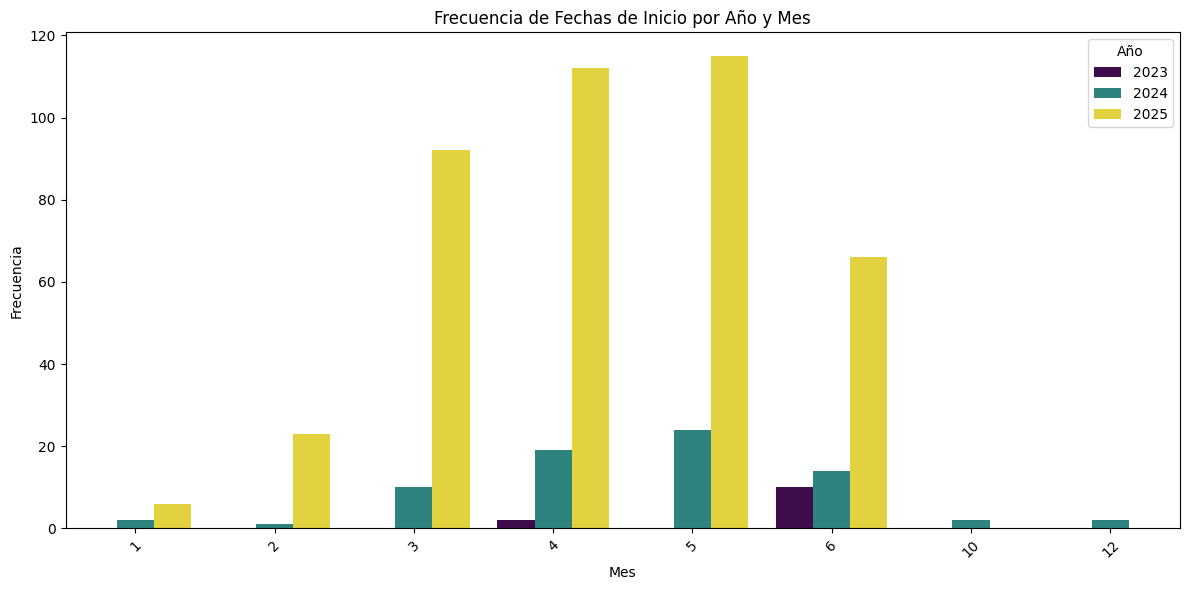

In [40]:
df['Fecha de Inicio'] = pd.to_datetime(df['Fecha de Inicio'], errors='coerce')

df['Año'] = df['Fecha de Inicio'].dt.year
df['Mes'] = df['Fecha de Inicio'].dt.month_name()  # Mes como nombre (enero, febrero, etc.)

df_grouped = df.groupby(['Año', 'Mes']).size().reset_index(name='Frecuencia')

df_grouped['Mes'] = pd.to_datetime(df_grouped['Mes'], format='%B').dt.month  # Convertir mes a número
df_grouped = df_grouped.sort_values(by=['Año', 'Mes'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Mes', y='Frecuencia', hue='Año', palette='viridis')

plt.title('Frecuencia de Fechas de Inicio por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()

plt.show()

Identificacion de tendencias temporales con base en Fechas


/tmp/ipython-input-1803297836.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


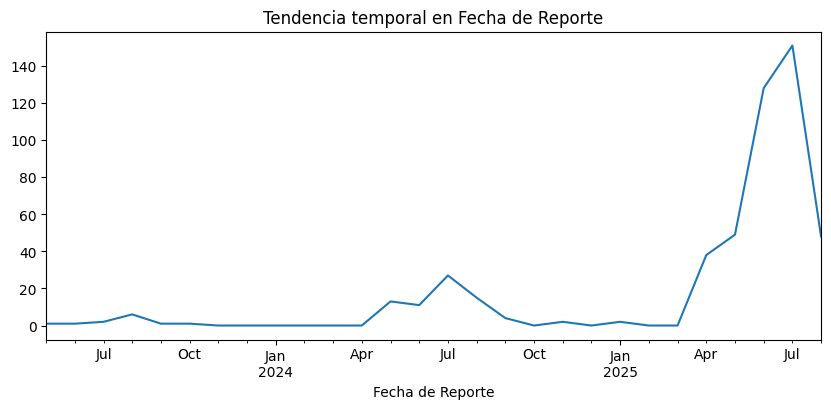

/tmp/ipython-input-1803297836.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


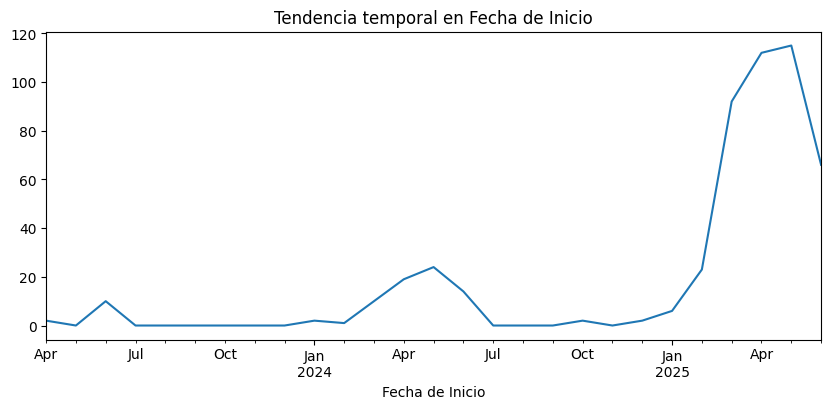

/tmp/ipython-input-1803297836.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


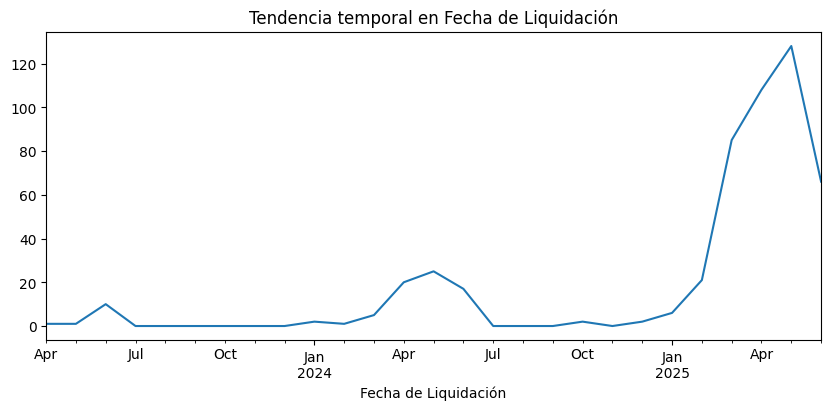

In [41]:
# Buscamos columnas que sean de tipo fecha
fechas = [c for c in df.columns if 'fecha' in c.lower() or 'date' in c.lower()]

for col in fechas:
    # Convertimos la columna a tipo datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    # Reagregamos valores por mes
    serie = df.set_index(col).resample('M').size()

    # Graficamos evolución en el tiempo
    plt.figure(figsize=(10,4))
    serie.plot()
    plt.title(f'Tendencia temporal en {col}')
    plt.show()

Generamos datos para la correlación





In [44]:
print(df.columns)

df['Fecha de Inicio'] = pd.to_datetime(df['Fecha de Inicio'], errors='coerce')

# Contar la cantidad de incendios por fecha y municipio
incendios_por_fecha_municipio = df.groupby(['Fecha de Inicio', 'Municipio']).size().reset_index(name='Cantidad de Incendios')

print(incendios_por_fecha_municipio)

Index(['Clave de Incendio', 'Fecha de Reporte', 'Longitud Grados',
       'Longitud Minutos', 'Longitud Segundos', 'Latitud Grados',
       'Latitud Minutos', 'Latitud Segundos', 'Cve de Municipio', 'Municipio',
       'Predio/Paraje', 'Causa', 'Causa Especifica', 'Fecha de Inicio',
       'Fecha de Liquidación', 'Tipo de Incendio', 'Tipo de Vegetación',
       'Zona Bioclimática', 'Arbolado Adulto', 'Renuevo', 'Arbustivo',
       'Herbaceo', 'Hojarasca', 'Total (ha)', 'Costo Estimado del Incendio',
       'Año', 'Mes', 'Mes_num'],
      dtype='object')
    Fecha de Inicio     Municipio  Cantidad de Incendios
0        2023-04-08    Tepehuanes                      1
1        2023-04-28    Tepehuanes                      1
2        2023-06-03    Tepehuanes                      1
3        2023-06-06    Tepehuanes                      2
4        2023-06-08    Tepehuanes                      2
..              ...           ...                    ...
335      2025-06-15     San Dimas        

Analizamos datos para la distribución bivariada Año - Municipio

In [45]:
df['Fecha de Inicio'] = pd.to_datetime(df['Fecha de Inicio'], errors='coerce')

df['Año'] = df['Fecha de Inicio'].dt.year

conteo_anual = df.groupby(['Municipio', 'Año']).size().reset_index(name='Cantidad de Eventos')

conteo_anual_pivot = conteo_anual.pivot(index='Municipio', columns='Año', values='Cantidad de Eventos').fillna(0)

conteo_anual_pivot.columns = ['Sumatoria 2023', 'Sumatoria 2024', 'Sumatoria 2025']

conteo_anual_pivot['Total'] = conteo_anual_pivot['Sumatoria 2023'] + conteo_anual_pivot['Sumatoria 2024'] + conteo_anual_pivot['Sumatoria 2025']

conteo_anual_pivot = conteo_anual_pivot.sort_values(by='Total', ascending=False)

print(conteo_anual_pivot)

                      Sumatoria 2023  Sumatoria 2024  Sumatoria 2025  Total
Municipio                                                                  
Mezquital                        0.0             0.0           184.0  184.0
Pueblo Nuevo                     0.0            74.0            75.0  149.0
Tamazula                         0.0             0.0            41.0   41.0
Durango                          0.0             0.0            39.0   39.0
San Dimas                        0.0             0.0            19.0   19.0
Tepehuanes                      12.0             0.0             6.0   18.0
Canelas                          0.0             0.0            15.0   15.0
Santiago Papasquiaro             0.0             0.0            10.0   10.0
Guanaceví                        0.0             0.0             7.0    7.0
Otáez                            0.0             0.0             5.0    5.0
Ocampo                           0.0             0.0             4.0    4.0
Topia       

Identificación de Variables Categoricas


In [46]:
# Ver los valores únicos en la columna 'Tipo de Incendio'
valores_unicos_tipo_incedio = df['Tipo de Incendio'].unique()
print("Valores únicos de 'Tipo de Incendio':")
print(valores_unicos_tipo_incedio)

# Ver los valores únicos en la columna 'Municipio'
valores_unicos_municipio = df['Municipio'].unique()
print("\nValores únicos de 'Municipio':")
print(valores_unicos_municipio)

Valores únicos de 'Tipo de Incendio':
['Superficial' nan 'De copa']

Valores únicos de 'Municipio':
['Pueblo Nuevo' 'Topia' 'Durango' 'Tepehuanes' 'Canelas'
 'Santiago Papasquiaro' 'San Dimas' 'Mezquital' 'Tamazula' 'Guanaceví'
 'El Oro' 'Otáez' 'Ocampo' 'Canatlán' 'Nombre de Dios' 'Cuencamé']
